
    [ ] Choose your target. Which column in your tabular dataset will you predict?
    [ ] Is your problem regression or classification?
    [ ] How is your target distributed?
        Classification: How many classes? Are the classes imbalanced?
        Regression: Is the target right-skewed? If so, you may want to log transform the target.
    [ ] Choose which observations you will use to train, validate, and test your model.
        Are some observations outliers? Will you exclude them?
        Will you do a random split or a time-based split?
    [ ] Choose your evaluation metric(s).
        Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    [ ] Begin to clean and explore your data.
    [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


In [49]:
import os

In [50]:
os.getcwd()

'C:\\Users\\SKrishna\\Documents\\GitHub\\airbnb'

In [51]:
import pandas as pd

In [52]:
listings = pd.read_csv('listings.csv')

In [53]:
listings.shape

(44620, 16)

In [54]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,NaN,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,Family perfect;Pool;Near Studios!,767,Melissa,NaN,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,Fireplace Mirrored Mini Suit (Website hidden b...,3008,Chas.,NaN,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,Zen Life at the Beach,3041,Yoga Priestess,NaN,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,NaN,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [55]:
import matplotlib.pyplot as plt

In [56]:
df = listings

In [57]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

(array([3.7338e+04, 4.6130e+03, 1.0660e+03, 5.1300e+02, 2.3800e+02,
        1.6500e+02, 1.3900e+02, 7.5000e+01, 8.6000e+01, 2.7000e+01,
        5.2000e+01, 2.7000e+01, 4.8000e+01, 1.4000e+01, 3.3000e+01,
        1.4000e+01, 2.0000e+01, 6.0000e+00, 2.4000e+01, 9.0000e+00,
        1.4000e+01, 4.0000e+00, 5.0000e+00, 3.0000e+00, 7.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 8.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00, 4.0000e+00,
        2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

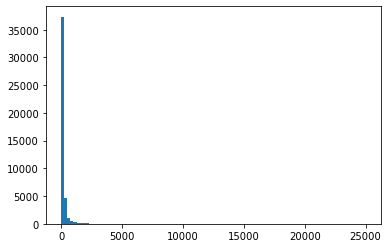

In [58]:
plt.hist(df['price'], bins=100)

In [59]:
df['price'].max()

25000

In [60]:
df['price'].describe()

count    44620.000000
mean       211.848364
std        578.938791
min          0.000000
25%         70.000000
50%        110.000000
75%        186.000000
max      25000.000000
Name: price, dtype: float64

In [61]:
df1 = df[df['price'] < df['price'].quantile(.95)]

In [62]:
#here we want to remove outliers such as the one with 25,000$ price tag as these will mess our model eventually.

In [63]:
df1['price'].describe()

count    42306.000000
mean       133.510731
std         95.833177
min          0.000000
25%         69.000000
50%        100.000000
75%        169.000000
max        549.000000
Name: price, dtype: float64

In [64]:
df1.shape

(42306, 16)

(array([9.000e+00, 4.500e+01, 1.430e+02, 1.550e+02, 5.150e+02, 7.440e+02,
        9.830e+02, 1.096e+03, 1.501e+03, 1.375e+03, 2.253e+03, 1.198e+03,
        1.562e+03, 1.574e+03, 1.630e+03, 1.120e+03, 1.687e+03, 1.196e+03,
        2.597e+03, 7.760e+02, 1.317e+03, 1.311e+03, 1.124e+03, 9.660e+02,
        5.990e+02, 7.650e+02, 5.370e+02, 1.735e+03, 5.030e+02, 3.610e+02,
        7.550e+02, 5.670e+02, 5.340e+02, 2.450e+02, 4.130e+02, 3.040e+02,
        1.393e+03, 6.900e+01, 1.660e+02, 1.780e+02, 5.820e+02, 1.670e+02,
        9.100e+01, 1.510e+02, 1.090e+02, 9.290e+02, 7.700e+01, 9.700e+01,
        1.130e+02, 6.000e+01, 2.470e+02, 1.150e+02, 1.140e+02, 1.330e+02,
        6.850e+02, 2.000e+01, 2.800e+01, 2.900e+01, 6.700e+01, 1.320e+02,
        4.200e+01, 5.100e+01, 4.100e+01, 4.750e+02, 1.500e+01, 4.800e+01,
        1.800e+01, 2.700e+01, 9.400e+01, 3.600e+01, 3.700e+01, 8.900e+01,
        3.690e+02, 3.000e+00, 1.300e+01, 1.600e+01, 2.500e+01, 5.600e+01,
        1.900e+01, 1.400e+01, 1.400e+0

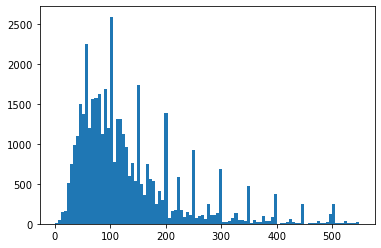

In [65]:
plt.hist(df1['price'], bins=100)

In [66]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,NaN,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,Family perfect;Pool;Near Studios!,767,Melissa,NaN,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,Fireplace Mirrored Mini Suit (Website hidden b...,3008,Chas.,NaN,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,Zen Life at the Beach,3041,Yoga Priestess,NaN,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,NaN,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [67]:
df1 = df1.drop(columns=['host_name','neighbourhood_group'])

In [68]:
df1.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,Family perfect;Pool;Near Studios!,767,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,Fireplace Mirrored Mini Suit (Website hidden b...,3008,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,Zen Life at the Beach,3041,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [69]:
df1.isna().sum()

id                                   0
name                                 6
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7617
reviews_per_month                 7617
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [70]:
#based on this info, it seems that we have 7600 listings that are possibly new and hence may need to be dropped. 
#since this dataset does not contain the date when the listing was first listed we can't check to see if they are just unused listings
#or new.

In [71]:
df1.isna().sum()

id                                   0
name                                 6
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7617
reviews_per_month                 7617
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [72]:
df1 = df1.dropna()

In [73]:
df1.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [74]:
df1.shape

(34686, 14)

In [75]:
df1.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,Family perfect;Pool;Near Studios!,767,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,Fireplace Mirrored Mini Suit (Website hidden b...,3008,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,Zen Life at the Beach,3041,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
5,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Del Rey,33.98833,-118.43224,Private room,75,1,262,2019-06-11,2.16,4,118


In [76]:
#now the analysis

AxesSubplot(0.125,0.125;0.775x0.755)


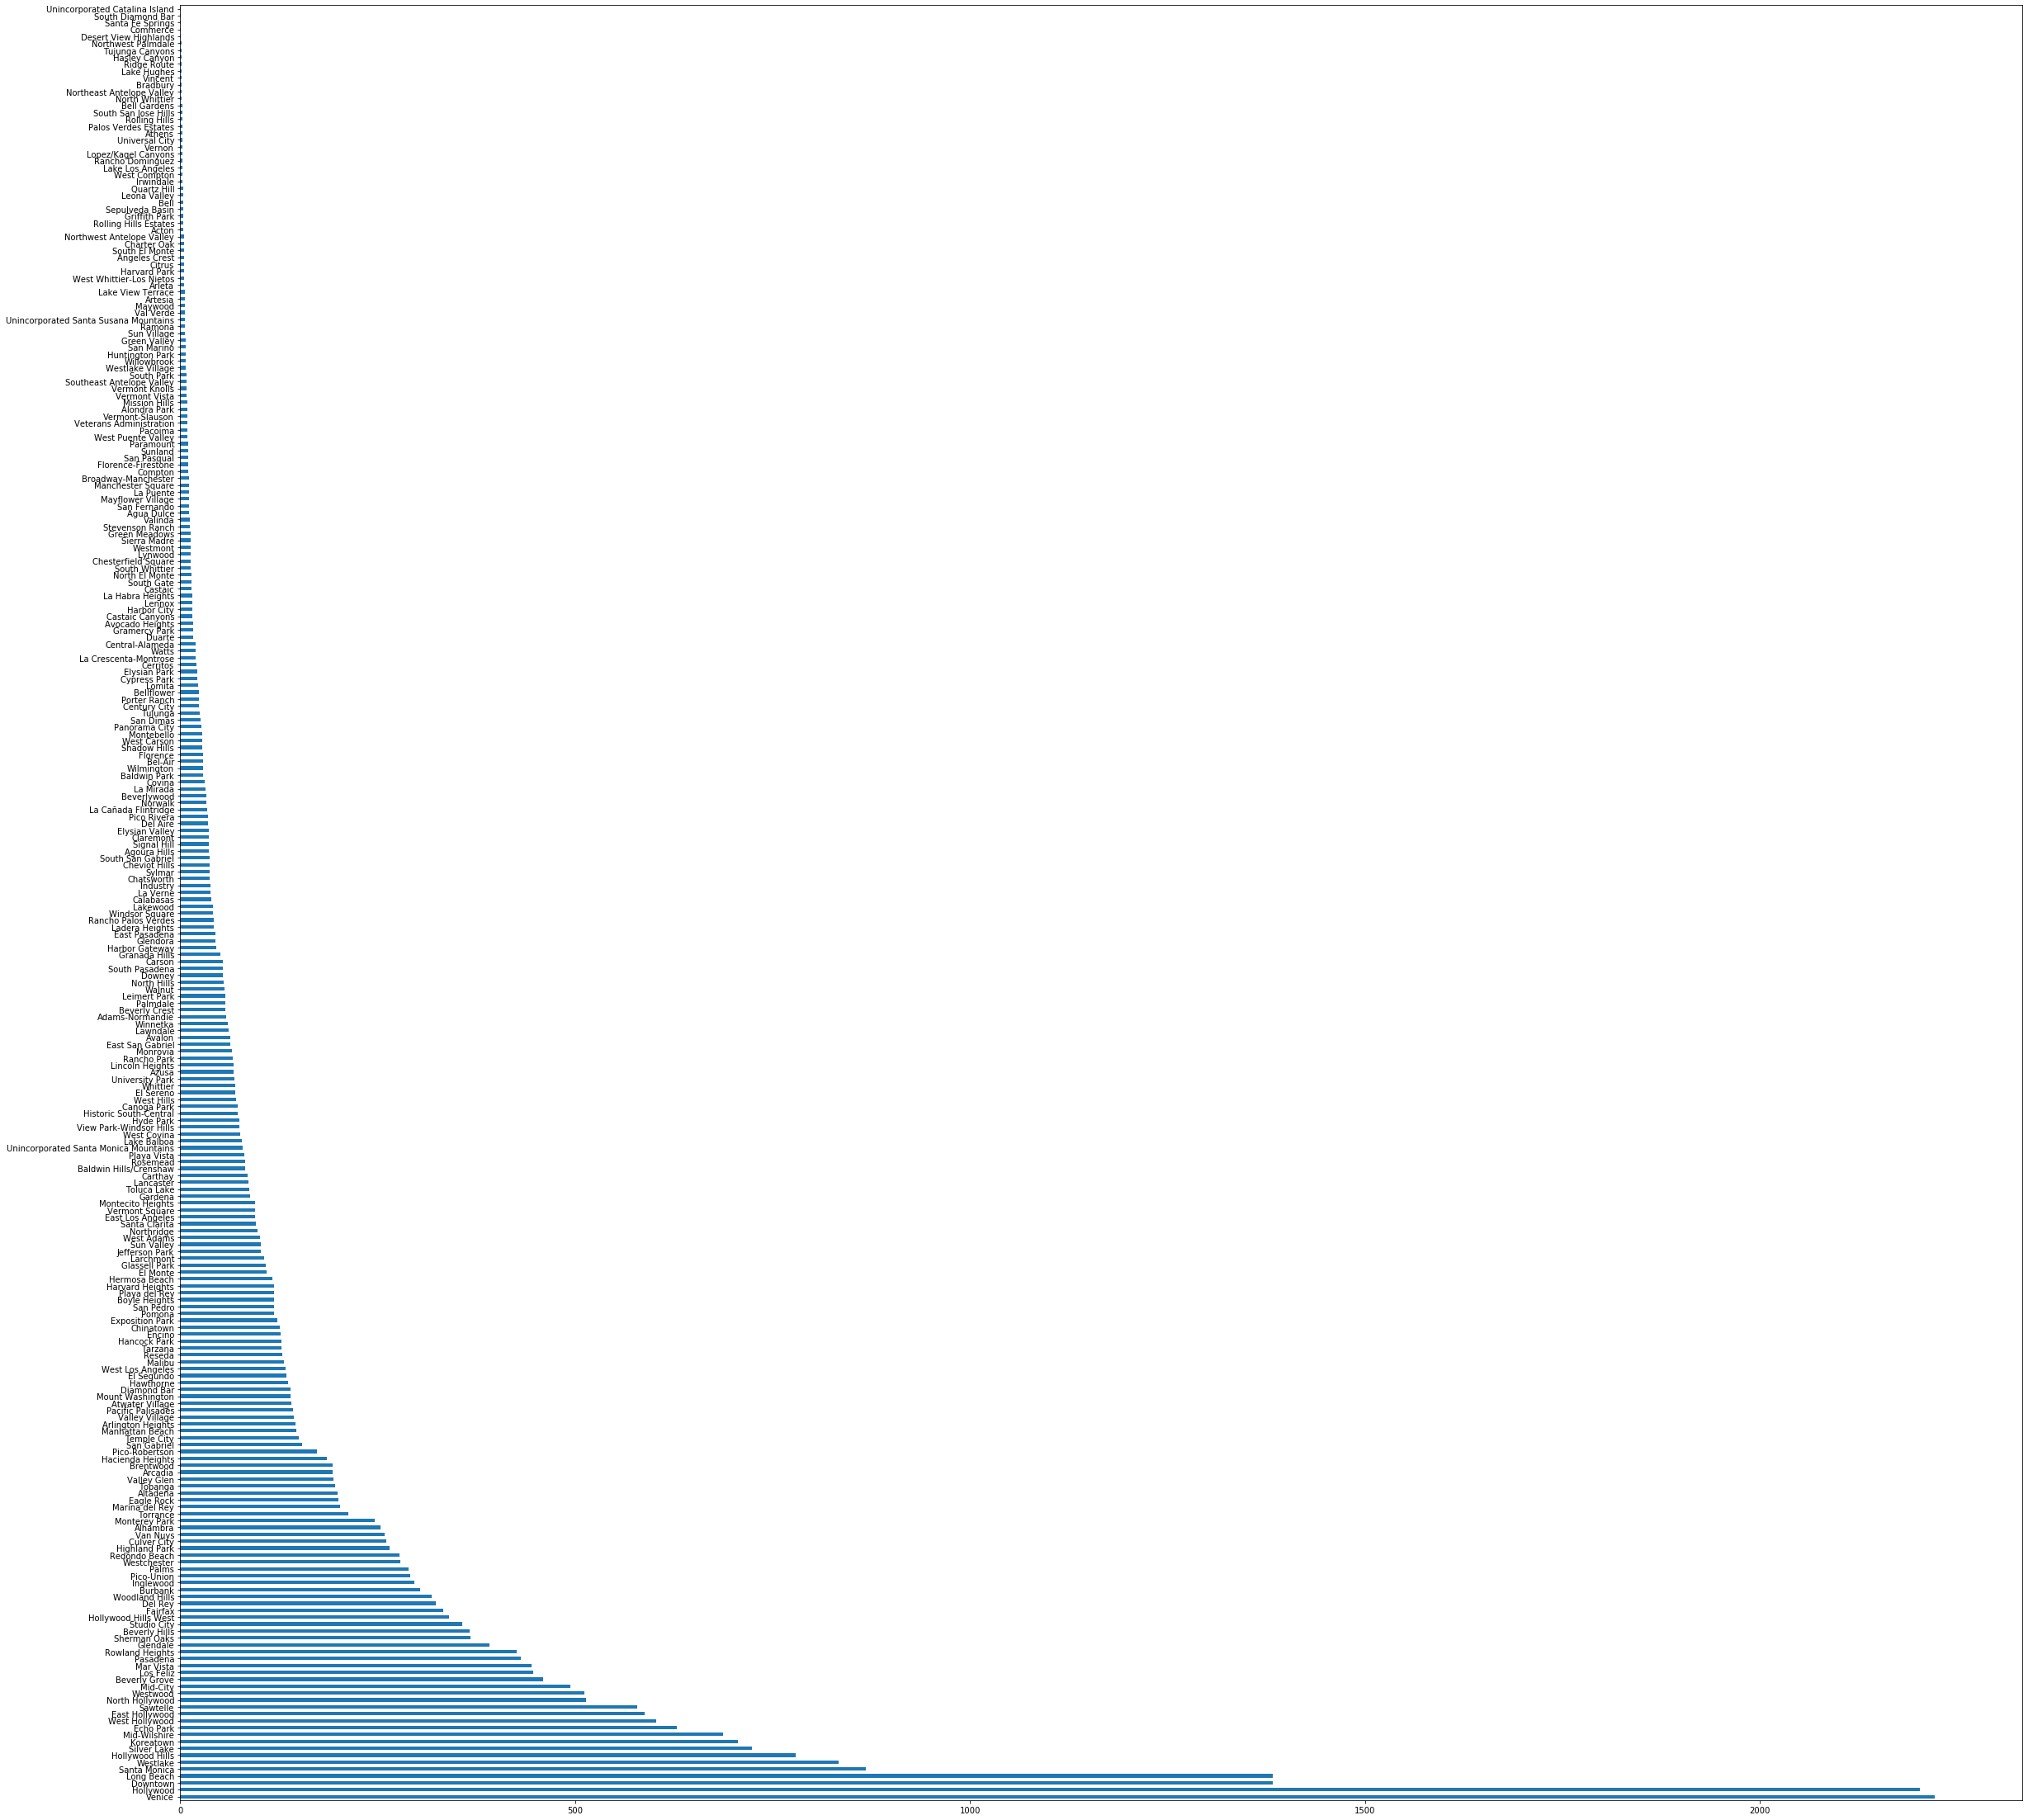

In [77]:
print(df1['neighbourhood'].value_counts().plot(kind='barh',figsize=(40,40)))

In [78]:
# we see that there are some neighbourhoods with possibly zero listings. let's confirm that number.

In [79]:
df2 = df1[df1.groupby('neighbourhood')['neighbourhood'].transform('size') > 4]
#here we have filtered values that have more than 4 listings. Need to study this transform method. Especially useful
#when we dont have matching indexes.

In [80]:
df2['neighbourhood'].value_counts()

Venice                       2221
Hollywood                    2202
Downtown                     1383
Long Beach                   1383
Santa Monica                  868
                             ... 
Citrus                          5
Harvard Park                    5
South El Monte                  5
Arleta                          5
Northwest Antelope Valley       5
Name: neighbourhood, Length: 227, dtype: int64

In [81]:
df2.shape

(34599, 14)

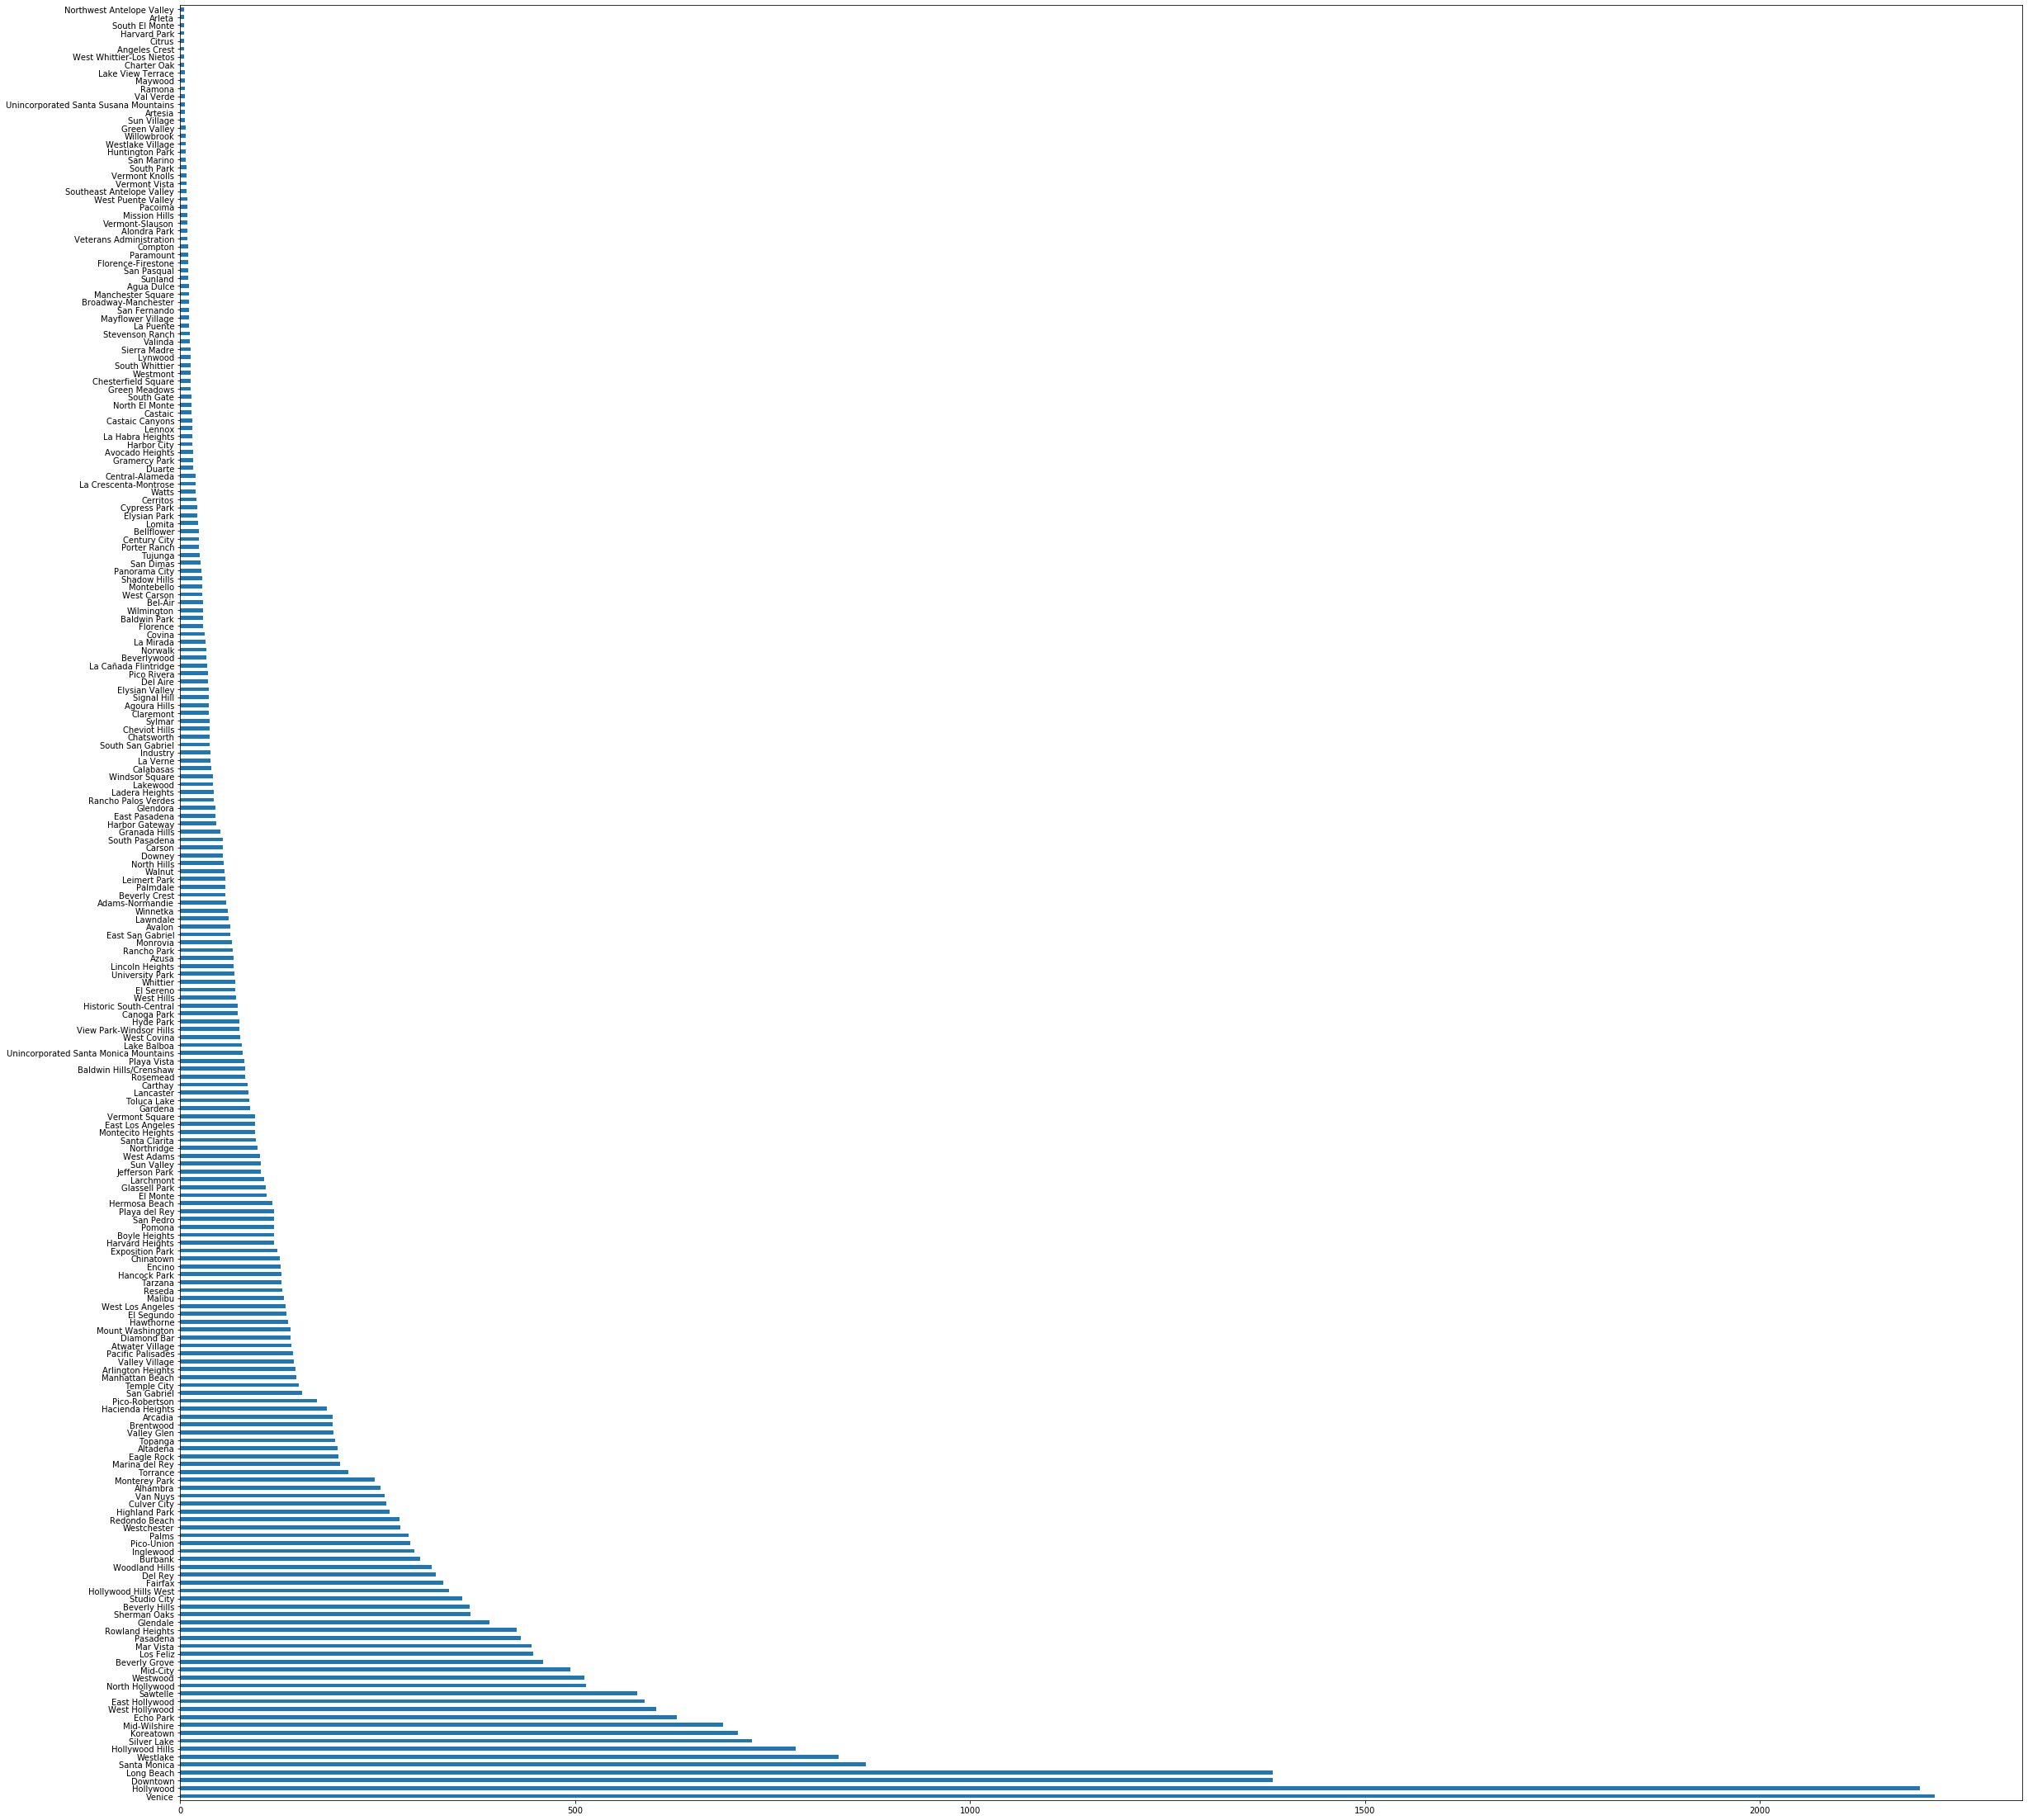

In [82]:
df2['neighbourhood'].value_counts().plot(kind='barh',figsize=(40,40))

In [83]:
df2.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,Family perfect;Pool;Near Studios!,767,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,Fireplace Mirrored Mini Suit (Website hidden b...,3008,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,Zen Life at the Beach,3041,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
5,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Del Rey,33.98833,-118.43224,Private room,75,1,262,2019-06-11,2.16,4,118


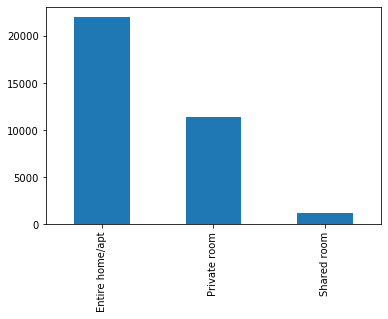

In [84]:
df2['room_type'].value_counts().plot(kind='bar')

In [37]:
df2['room_type'].value_counts(normalize=True)

Entire home/apt    0.636174
Private room       0.328507
Shared room        0.035319
Name: room_type, dtype: float64

In [85]:
df2 = df2.drop(columns=['name'])

In [86]:
df2.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,521,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,98
1,344,767,Burbank,34.16562,-118.33458,Entire home/apt,168,2,6,2018-10-21,0.16,1,0
2,2708,3008,Hollywood,34.09768,-118.34602,Private room,79,28,20,2019-05-20,0.32,2,238
3,2732,3041,Santa Monica,34.00475,-118.48127,Private room,140,1,18,2018-11-15,0.18,2,309
5,5728,9171,Del Rey,33.98833,-118.43224,Private room,75,1,262,2019-06-11,2.16,4,118


In [ ]:
#need to add model